<a href="https://colab.research.google.com/github/Bougriba/Deeplearning/blob/main/Image_Classification_Using_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
import os

# Specify the path to your desired directory on D: drive
d_drive_directory = '/content/drive/MyDrive/dataset'

# Change the current working directory to the specified directory
os.chdir(d_drive_directory)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/dataset'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        'training_set',  # this is the target directory
        target_size=(64, 64),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')

Found 8376 images belonging to 2 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
        'test_set',  # this is the target directory
        target_size=(64, 64),  # all images will be resized to 150x150
        batch_size=32,
        class_mode='binary')

Found 2125 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32 , kernel_size=3, input_shape= [64, 64,3]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


In [ ]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=25,
        validation_data=test_generator,
        validation_steps=60)
model.save_weights('second_try.h5')

<ipython-input-81-3b89a1fe9386>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/25
  2/100 [..............................] - ETA: 27s - loss: 0.7123 - accuracy: 0.4375

KeyboardInterrupt: ignored

In [ ]:
model.load_weights('/content/drive/MyDrive/dataset/second_try.h5')

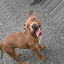

In [ ]:
import numpy as np
tf.keras.utils.load_img(
    '/content/drive/MyDrive/dataset/training_set/dogs/cat_0_5364.jpeg',
    grayscale=False,
    color_mode="rgb",
    target_size=(64,64),
    interpolation="nearest",
    keep_aspect_ratio=False,
)

In [ ]:
image = tf.keras.utils.load_img('/content/drive/MyDrive/dataset/training_set/dogs/cat_0_5364.jpeg',target_size=(64,64))
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.expand_dims(input_arr , axis=0)
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 23ms/step


In [ ]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
predictions

array([[1.]], dtype=float32)

In [ ]:
if predictions[0][0]==1 :
  print('True')
else :
  print('False')

True
